# Assignment8

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [6]:
df = pd.read_csv("car_data.csv")

In [7]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing

import pylab as pl
import itertools

%matplotlib inline

# **Tasks, Part 1**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Mileage
Feature names seen at fit time, yet now missing:
- Price

  warnings.warn(message, FutureWarning)


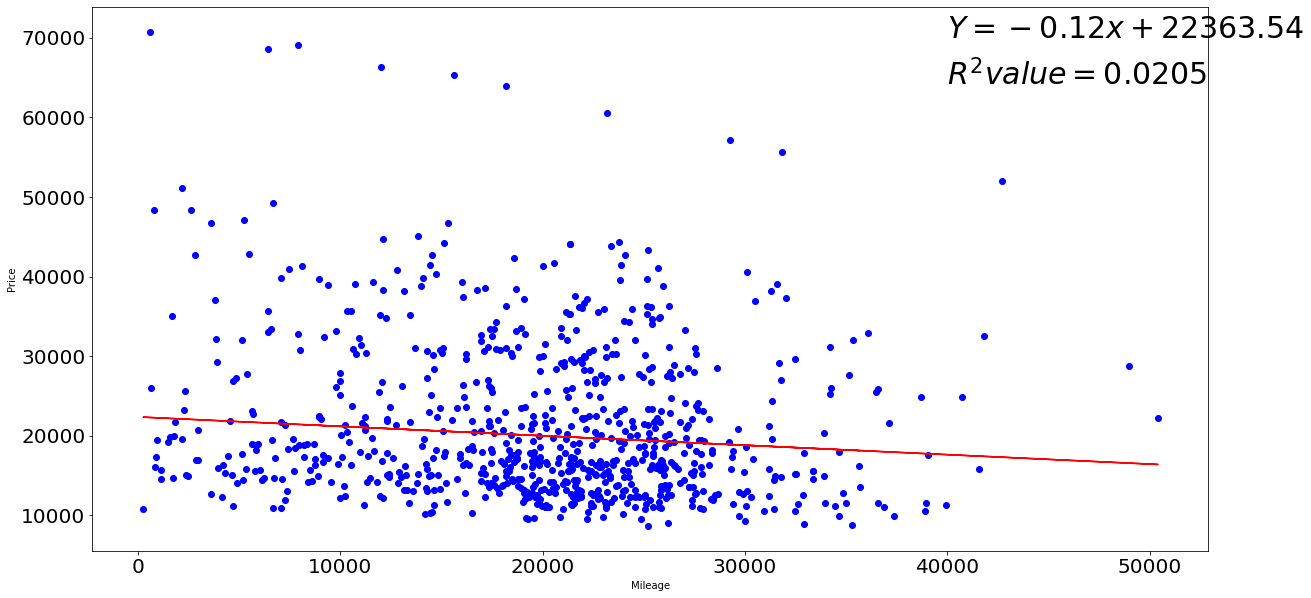

In [9]:
xPrice = df[["Price"]]
yMileage = df[["Mileage"]]

regr = LinearRegression()
regr.fit(xPrice, yMileage)
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.scatter(yMileage, xPrice, color='blue') 
plt.plot(yMileage, regr.predict(yMileage), color='red')
plt.text(40000, 70000, '$Y = %.2fx + %.2f$' % (regr.coef_, regr.intercept_), fontsize=30)
plt.text(40000, 64000, '$R^2 value = %.4f$'% regr.score(xPrice, yMileage), fontsize=30)
plt.ylabel("Price")
plt.xlabel('Mileage')

plt.show()

In [10]:
print('The R Score of .020 is not a great one.  Need to look at other options')

The R Score of .020 is not a great one.  Need to look at other options


# **Tasks, Part 2**

In [11]:
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
price = ["Price"]

X = df[features]
y = df[price]

regr = LinearRegression()
regrtask2 = regr.fit(X, y)
print('R-squared based on Mileage, Cylinder, Liter, Doors, Cruise, Sound, Leather:', regrtask2.score(X,y))

R-squared based on Mileage, Cylinder, Liter, Doors, Cruise, Sound, Leather: 0.4462643536728379


In [12]:
print('.44 is also not a strong correlation')

.44 is also not a strong correlation


## **Tasks, Hard Mode**

In [13]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [14]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_with_dummies[columns]
y = df_with_dummies['Price']

regr= LinearRegression()
regr.fit(X, y)

LinearRegression()

In [15]:
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
print('Score:', regr.score(X, y))

Intercept: 23983.77190961674
Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03]
Score: 0.9363889951039477
